# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



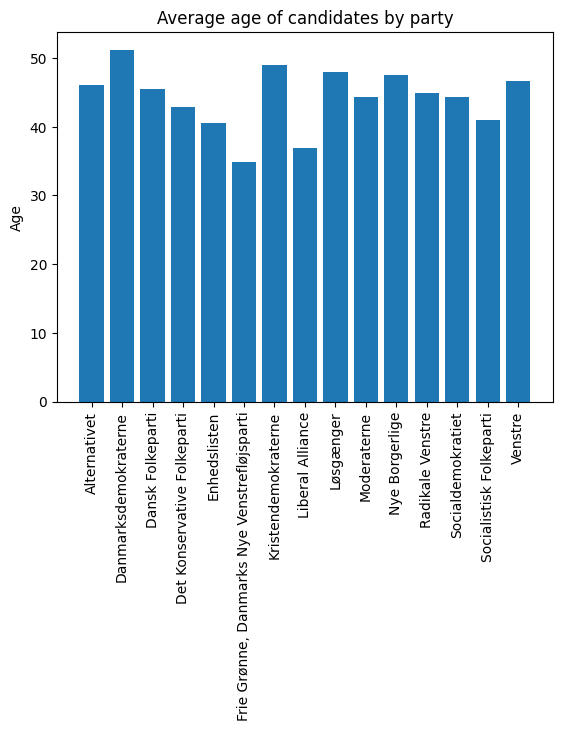

In [1]:
# Age of candidates grouped by parties

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from xlsx file called alldata.xslx
data = pd.read_excel('alldata.xlsx')

# Group by party and calculate the average age
age = data.groupby('parti')['alder'].mean()

# Plot the data
plt.bar(age.index, age)
plt.xticks(rotation=90)
plt.ylabel('Age')
plt.title('Average age of candidates by party')
plt.show()

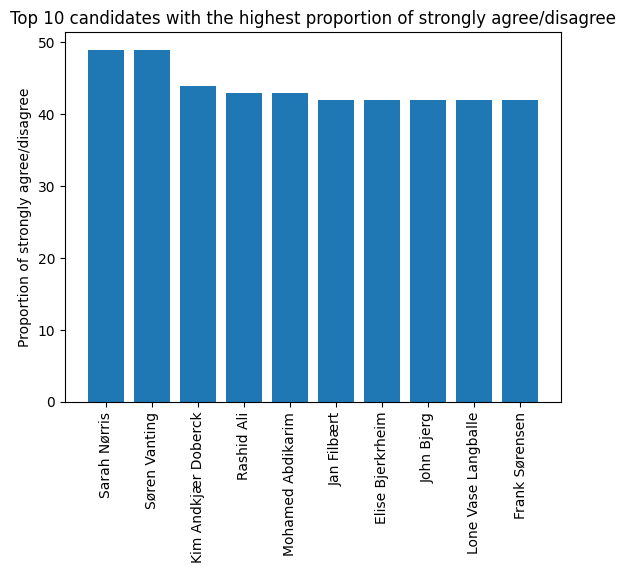

In [2]:
# An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" (marked as 2) or "strongly disagree" (marked as -2) responses.

# Read the data from xlsx file called alldata.xslx and remove the following columns: alder, parti, storkreds
data = pd.read_excel('alldata.xlsx').drop(columns=['alder', 'parti', 'storkreds'])

# Calculate the proportion of -2 and 2 in each row
data['strongly'] = (data == -2).sum(axis=1) + (data == 2).sum(axis=1)

# Sort the data by the proportion of -2 and 2
data = data.sort_values('strongly', ascending=False)

# plot the top 10 candidates
plt.bar(data['navn'][:10], data['strongly'][:10])
plt.xticks(rotation=90)
plt.ylabel('Proportion of strongly agree/disagree')
plt.title('Top 10 candidates with the highest proportion of strongly agree/disagree')
plt.show()


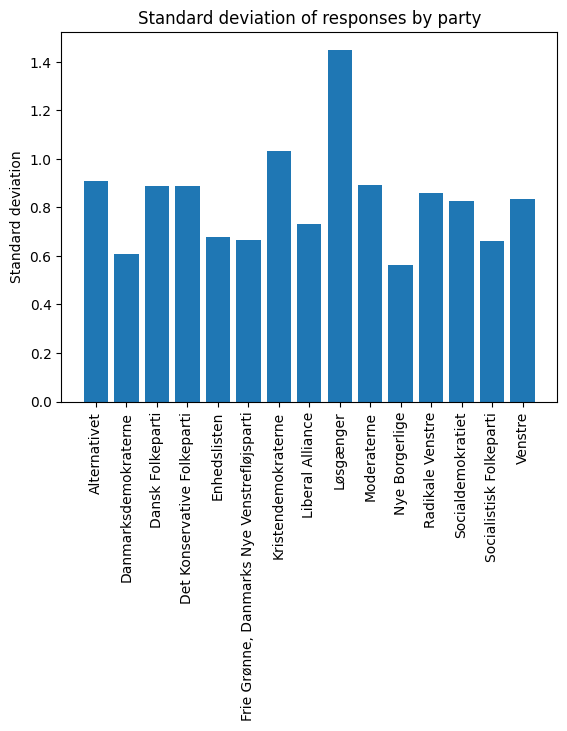

In [3]:
import seaborn as sns
# Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.

# Read the data from xlsx file called alldata.xslx and remove the following columns: alder, navn, storkreds
data = pd.read_excel('alldata.xlsx').drop(columns=['alder', 'navn', 'storkreds'])

# Group by party and calculate the standard deviation of the responses
std = data.groupby('parti').std()

# Plot the data
plt.bar(std.index, std.mean(axis=1))
plt.xticks(rotation=90)
plt.ylabel('Standard deviation')
plt.title('Standard deviation of responses by party')
plt.show()

#The most internal disagreements are in the party Løsgænger

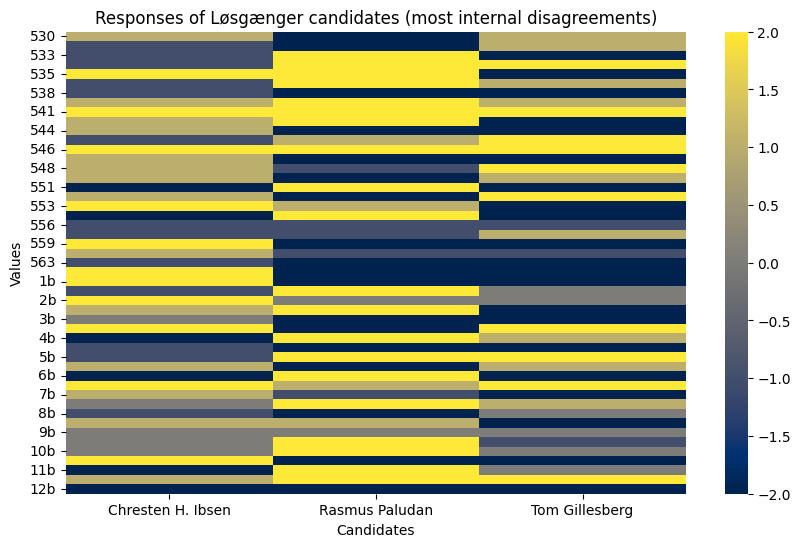

In [4]:
# A heatmap of the responses of the Løsgænger candidates.

data = pd.read_excel('alldata.xlsx').drop(columns=['alder', 'storkreds'])
filtered_data = data[data['parti'] == 'Løsgænger']

# select relevant columns for the heatmap, that is all the columns without navn and parti
heatmap_data = filtered_data.drop(columns=['parti'])

#group by navn
grouped_data = heatmap_data.groupby('navn').sum()

#plot the heatmap, put candidates on x and values on y
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data.T, cmap='cividis', annot=False, fmt='g', vmin=-2, vmax=2)

#set labels
plt.xlabel('Candidates')
plt.ylabel('Values')
plt.title('Responses of Løsgænger candidates (most internal disagreements)')

plt.show()

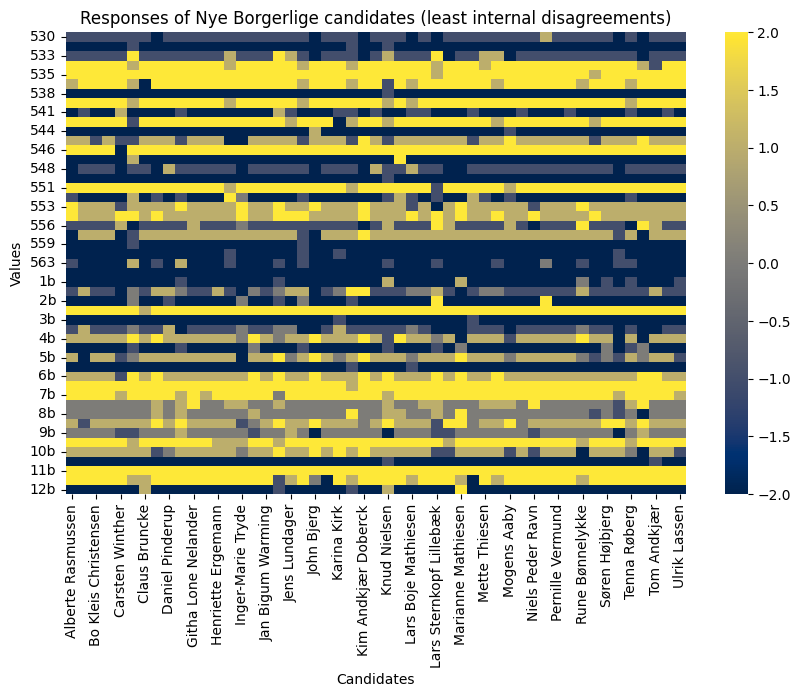

In [5]:
# A heatmap of the responses of the Nye Borgerlige candidates.

data = pd.read_excel('alldata.xlsx').drop(columns=['alder', 'storkreds'])
filtered_data = data[data['parti'] == 'Nye Borgerlige']

# select relevant columns for the heatmap, that is all the columns without navn and parti
heatmap_data = filtered_data.drop(columns=['parti'])

#group by navn
grouped_data = heatmap_data.groupby('navn').sum()

#plot the heatmap, put candidates on x and values on y
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data.T, cmap='cividis', annot=False, fmt='g', vmin=-2, vmax=2)

#set labels
plt.xlabel('Candidates')
plt.ylabel('Values')
plt.title('Responses of Nye Borgerlige candidates (least internal disagreements)')

plt.show()

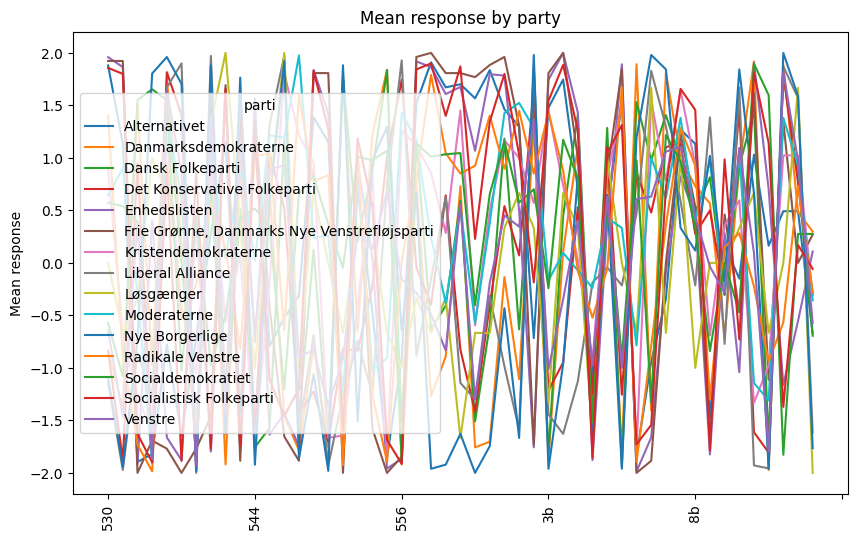

In [35]:
# A plot of parties and their mean respons on every survey question

import matplotlib.pyplot as plt
import numpy as np

#drop irrelevant columns
data = pd.read_excel('alldata.xlsx').drop(columns=['alder', 'navn', 'storkreds'])

#group by party and calculate the mean of the responses
mean = data.groupby('parti').mean()

#join drq.xlsx with tv2q.xlsx 
drq = pd.read_excel('drq.xlsx')
tv2q = pd.read_excel('tv2q.xlsx')

def getQuestionNameById(id):
    if(drq['ID'].isin([id]).any()):
        return drq.loc[drq['ID'] == id, 'Question'].values[0]
    else:
        return tv2q.loc[tv2q['id'] == id, 'question'].values[0]

# display(mean)

#plot the data
fig, ax = plt.subplots(figsize=(10, 6))
mean.T.plot(ax=ax)
plt.xticks(rotation=90)
plt.ylabel('Mean response')
plt.title('Mean response by party')
plt.show()


In [ ]:
#clean up of data
#in drq.xlsx rename the Title column value, if the value contains KLIMA OG ENERGI, change it to klima

# drq['Title'] = drq['Title'].str.replace('KLIMA OG ENERGI', 'climate')
# drq['Title'] = drq['Title'].str.replace('SUNDHED', 'healthcare')
# drq['Title'] = drq['Title'].str.replace('EU OG UDENRIGS', 'foreign politics')
# drq['Title'] = drq['Title'].str.replace('UDDANNELSE', 'education')
# drq['Title'] = drq['Title'].str.replace('ARBEJDSMARKED OG ØKONOMI', 'economy')

# #the same for tv2q.xlsx
# tv2q['header'] = tv2q['header'].str.replace('Miljø og klima', 'climate')
# tv2q['header'] = tv2q['header'].str.replace('Hospitaler og sundhed', 'healthcare')
# tv2q['header'] = tv2q['header'].str.replace('Udenrigs- og forsvarspolitik', 'foreign politics')
# tv2q['header'] = tv2q['header'].str.replace('Skole og uddannelse', 'education')
# tv2q['header'] = tv2q['header'].str.replace('Økonomi', 'economy')

##picovina